## Classification
## 0 -> Unhealthy

## 1 -> Healthy

In [1]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, mean_absolute_error, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.decomposition import PCA
from Mod_Productor import Mod_Productor as MP
# Instantiate the Template class


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file


df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15 = [
    pd.read_excel(data_path, sheet_name=i) for i in range(16)
]

In [2]:
# Lets add the column 'Sana' to all dataframes except df0
for i, df in enumerate([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], start=1):
    df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))
    df.drop(columns=['Tratamiento'], inplace=True)
    # Now if the dataframe have the column 'Planta' delete it
    if 'Planta' in df.columns:
        df.drop(columns=['Planta'], inplace=True)


# lets take 2 samples of each dataframe to use as test data later and put them in the same csv file 
test_samples = []
for i, df in enumerate([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], start=1):
    test_sample = df.sample(n=31, random_state=42)
    test_sample.insert(0, 'Day', i)  # Add a column to identify from which sheet they come from
    test_samples.append(test_sample)


# Save all test samples to one CSV file
pd.concat(test_samples, ignore_index=True).to_csv('test_sample_df.csv', index=False)
print("All test samples saved to 'test_sample_df.csv'")

# now remove the sampled rows from the original dataframes taking care to remove the 'Day' column first
for i, (df, test_sample) in enumerate(zip([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], 
                                            test_samples), start=1):
    df_sample = test_sample.drop(columns=['Day'])
    df.drop(df_sample.index, inplace=True)
    


All test samples saved to 'test_sample_df.csv'


In [3]:
# Produce the models for each dataframe
models = {}
for i, df in enumerate([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], start=1):
    print(f"Producing model for DataFrame df{i}...")
    modelo = MP(df, target = 'Sana', test_size=0.2, random_state=42, PCA_components=3)
    modelo.train_model()
    models[f'model_df{i}'] = modelo

Producing model for DataFrame df1...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}

Best scores across all metrics:
  Accuracy: 0.9973
  Precision: 0.9947
  Recall: 1.0000
  F1-Score: 0.9973
  ROC-AUC: 1.0000
Producing model for DataFrame df2...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}

Best scores across all metrics:
  Accuracy: 0.9309
  Precision: 0.8850
  Recall: 1.0000
  F1-Score: 0.9373
  ROC-AUC: 0.9289
Producing model for DataFrame df3...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 100, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

Best scores across all metrics:
  Accuracy: 0.7078
  Precision: 0.6794
  Recall: 0.7926
  F1-Score: 0.7313
  ROC-AUC: 0.7407
Producing model for DataFrame df4...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

Best scores across all metrics:
  Accuracy: 0.8640
  Precision: 0.8425
  Recall: 0.9317
  F1-Score: 0.8783
  ROC-AUC: 0.9024
Producing model for DataFrame df5...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 10, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

Best scores across all metrics:
  Accuracy: 0.6636
  Precision: 0.6721
  Recall: 0.7114
  F1-Score: 0.6840
  ROC-AUC: 0.7120
Producing model for DataFrame df6...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.8, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

Best scores across all metrics:
  Accuracy: 0.6743
  Precision: 0.6564
  Recall: 0.7489
  F1-Score: 0.6947
  ROC-AUC: 0.7518
Producing model for DataFrame df7...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 0.01, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'saga'}

Best scores across all metrics:
  Accuracy: 0.9938
  Precision: 0.9882
  Recall: 1.0000
  F1-Score: 0.9939
  ROC-AUC: 1.0000
Producing model for DataFrame df8...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 0.1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.2, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

Best scores across all metrics:
  Accuracy: 0.8238
  Precision: 0.7595
  Recall: 0.9671
  F1-Score: 0.8484
  ROC-AUC: 0.8595
Producing model for DataFrame df9...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'saga'}

Best scores across all metrics:
  Accuracy: 0.8268
  Precision: 0.7995
  Recall: 0.9566
  F1-Score: 0.8606
  ROC-AUC: 0.8455
Producing model for DataFrame df10...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}

Best scores across all metrics:
  Accuracy: 0.8750
  Precision: 0.8427
  Recall: 0.9389
  F1-Score: 0.8851
  ROC-AUC: 0.9224
Producing model for DataFrame df11...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.8, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

Best scores across all metrics:
  Accuracy: 0.8312
  Precision: 0.7839
  Recall: 0.9886
  F1-Score: 0.8663
  ROC-AUC: 0.8376
Producing model for DataFrame df12...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'liblinear'}

Best scores across all metrics:
  Accuracy: 0.8886
  Precision: 0.8551
  Recall: 0.9447
  F1-Score: 0.8961
  ROC-AUC: 0.9375
Producing model for DataFrame df13...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)
c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters found:  {'PCA__n_components': 3, 'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'saga'}

Best scores across all metrics:
  Accuracy: 0.9387
  Precision: 0.9115
  Recall: 0.9806
  F1-Score: 0.9429
  ROC-AUC: 0.9717
Producing model for DataFrame df14...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'liblinear'}

Best scores across all metrics:
  Accuracy: 0.8893
  Precision: 0.8375
  Recall: 1.0000
  F1-Score: 0.9067
  ROC-AUC: 0.9179
Producing model for DataFrame df15...


c:\Users\ricar\Documents\GitHub\DiPreSi\Modelos\Modelo 1\Mod_Productor.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


Best parameters found:  {'PCA__n_components': 3, 'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

Best scores across all metrics:
  Accuracy: 0.8170
  Precision: 0.7699
  Recall: 1.0000
  F1-Score: 0.8593
  ROC-AUC: 0.8163


## Big Model

In [4]:
# First make a prediction on the test samples with ALL models and put the results in a csv file

# Concatenate all test samples first
df_predictions = pd.concat(test_samples, ignore_index=True)

# For each model, make predictions on ALL test samples
for model_num in range(1, 16):
    modelo = models[f'model_df{model_num}']
    
    # Prepare all test data (removing 'Sana' and 'Day' columns, keeping only wavelength features)
    feature_columns = [col for col in df_predictions.columns if col not in ['Sana', 'Day'] and not str(col).startswith('pred_')]
    X_test_all = df_predictions[feature_columns].values
    
    # Make predictions with this model on all test samples
    y_pred = modelo.model.predict(X_test_all)
    
    # Add predictions as a new column
    df_predictions[f'pred_{model_num}'] = y_pred
    print(f"Model {model_num} predictions added to column 'pred_{model_num}'")

# Display the first few rows
print("\nFirst few rows of predictions:")
print(df_predictions.head())

# Save the predictions to a CSV file
df_predictions.to_csv('predictions.csv', index=False)
print("\nPredictions saved to 'predictions.csv'")

# Show column names to verify
print("\nColumns in df_predictions:")
print(df_predictions.columns.tolist())

Model 1 predictions added to column 'pred_1'
Model 2 predictions added to column 'pred_2'
Model 3 predictions added to column 'pred_3'
Model 4 predictions added to column 'pred_4'
Model 5 predictions added to column 'pred_5'
Model 6 predictions added to column 'pred_6'
Model 7 predictions added to column 'pred_7'
Model 8 predictions added to column 'pred_8'
Model 9 predictions added to column 'pred_9'
Model 10 predictions added to column 'pred_10'
Model 11 predictions added to column 'pred_11'
Model 12 predictions added to column 'pred_12'
Model 13 predictions added to column 'pred_13'
Model 14 predictions added to column 'pred_14'
Model 15 predictions added to column 'pred_15'

First few rows of predictions:
   Day  Sana       350       351       352       353       354       355  \
0    1     1  0.077190  0.076254  0.078321  0.074348  0.071021  0.068562   
1    1     1  0.083243  0.080013  0.085973  0.080781  0.075597  0.073218   
2    1     0  0.075640  0.073273  0.075933  0.069775 

In [5]:
# Drop the columns of the wavelength features
df_predictions.drop(columns=feature_columns, inplace=True)

In [6]:
df_predictions.head(10)


,Day,Sana,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12,pred_13,pred_14,pred_15
0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1
1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1
2,1,0,0,0,0,1,1,1,0,1,1,0,1,1,1,1,1
3,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,1
4,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,1
5,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
6,1,0,0,0,0,1,0,1,0,1,1,0,1,1,0,1,1
7,1,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1
8,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1
9,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1


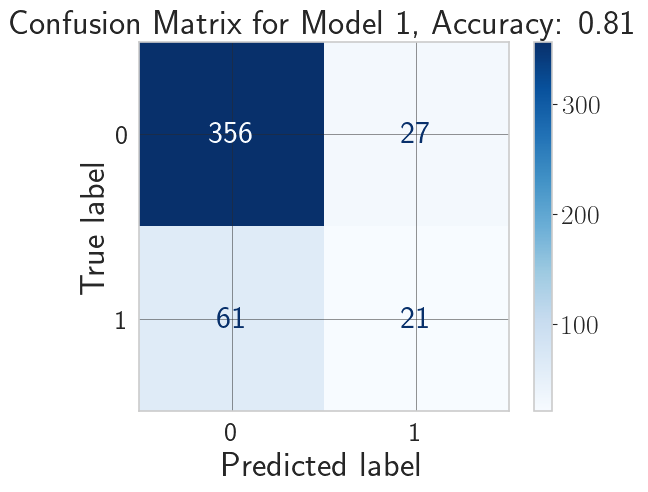

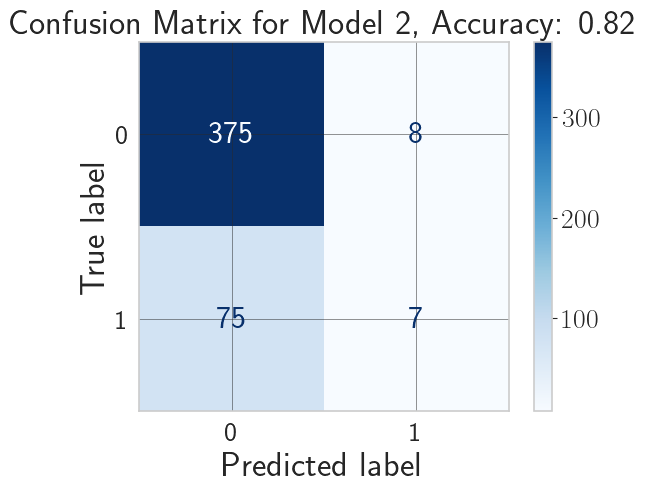

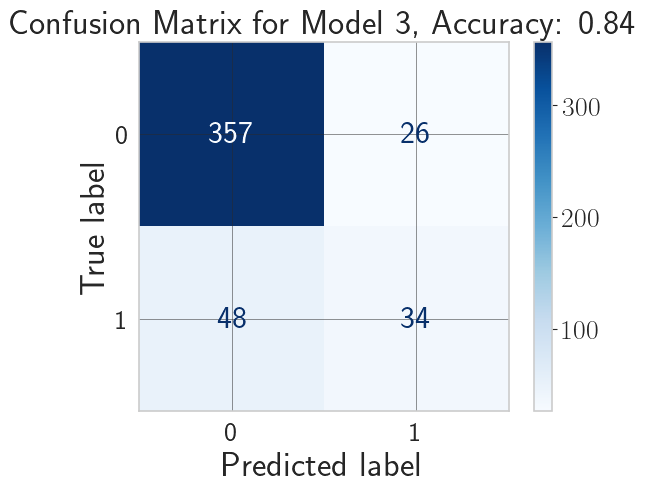

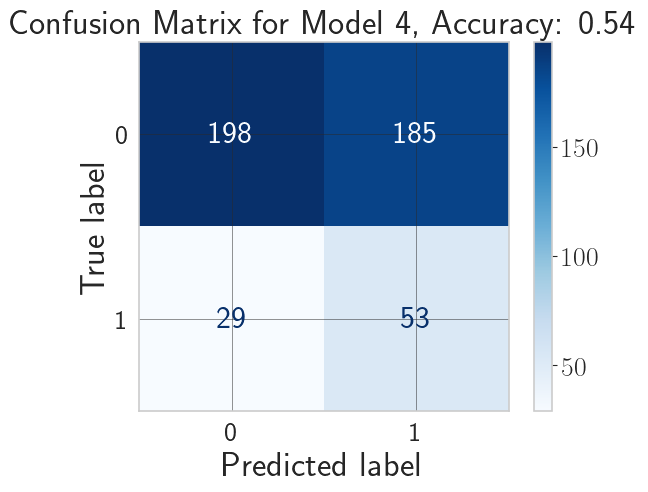

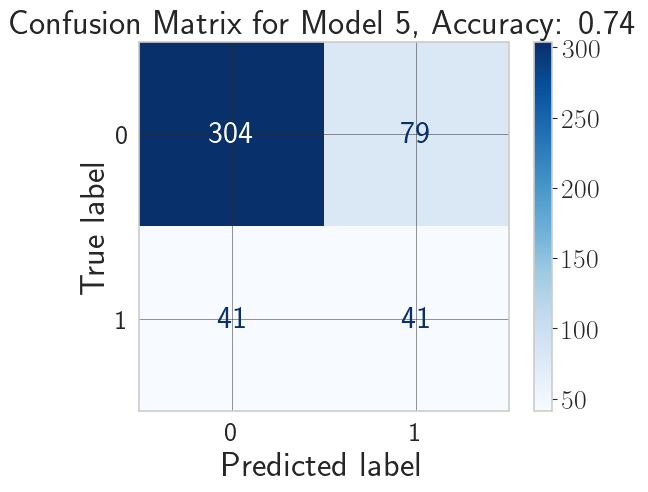

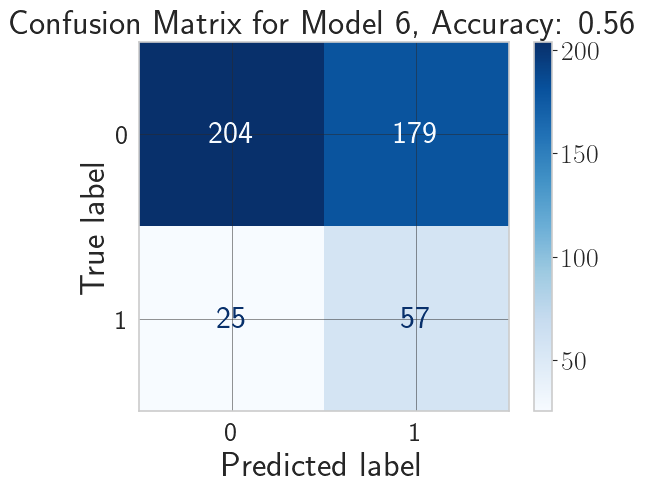

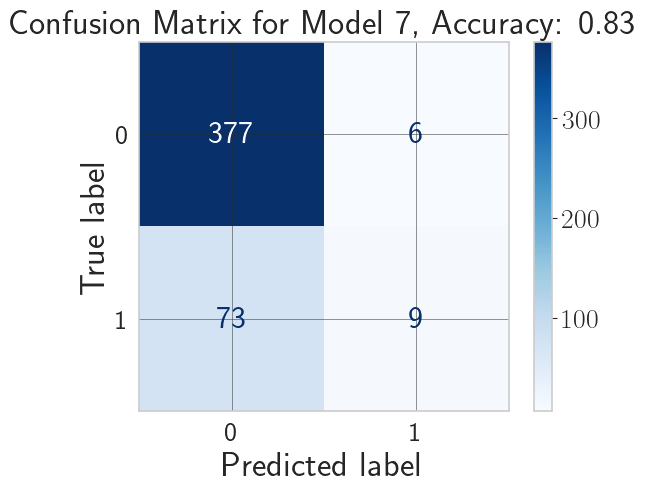

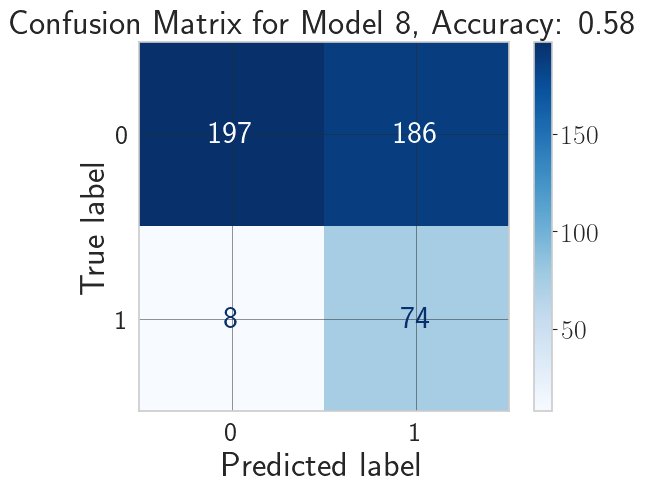

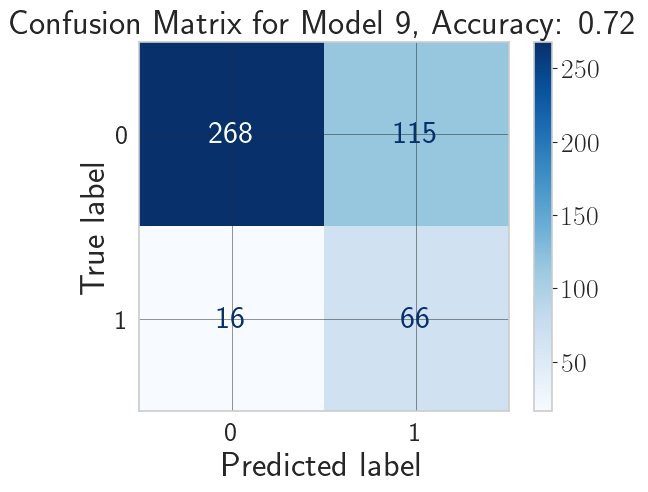

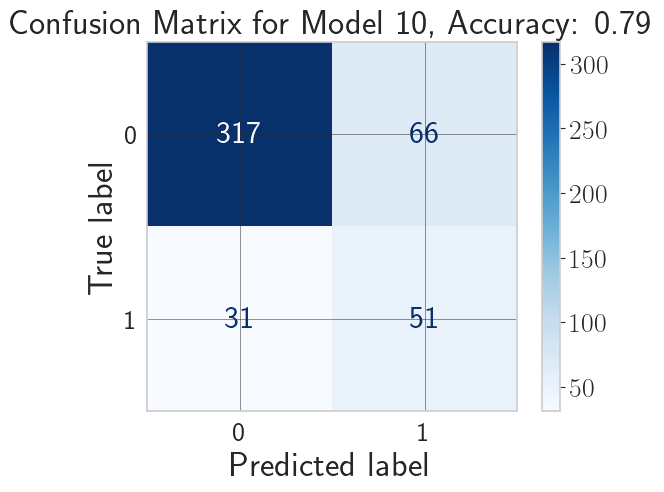

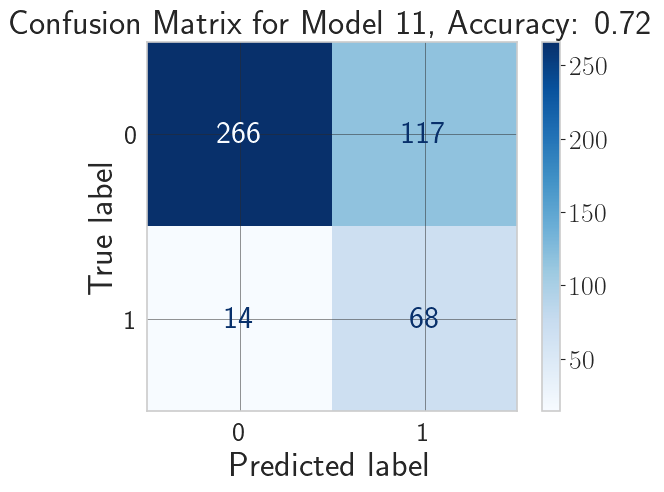

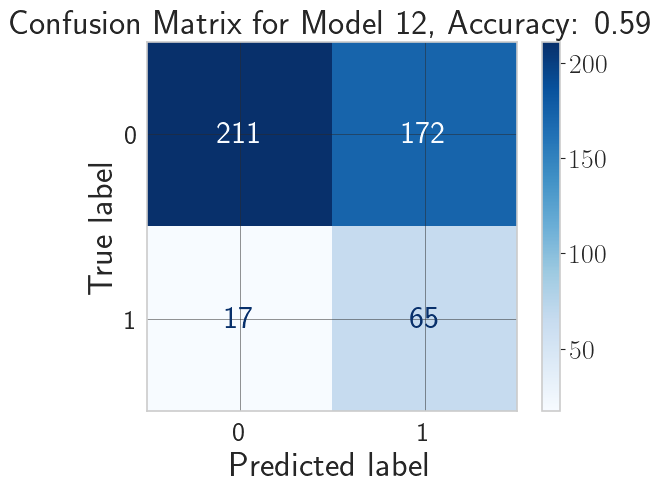

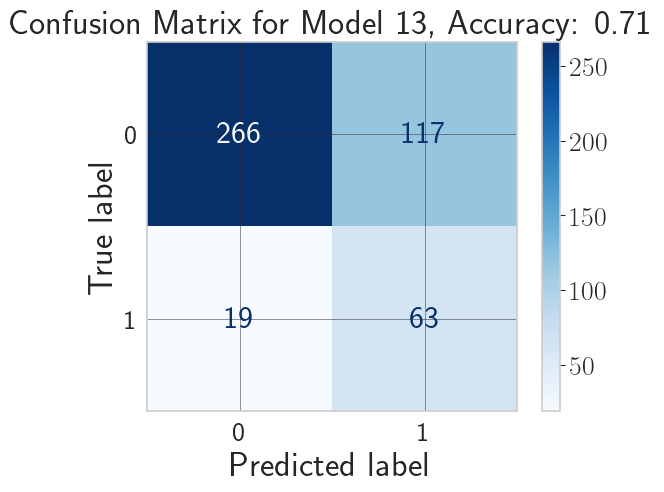

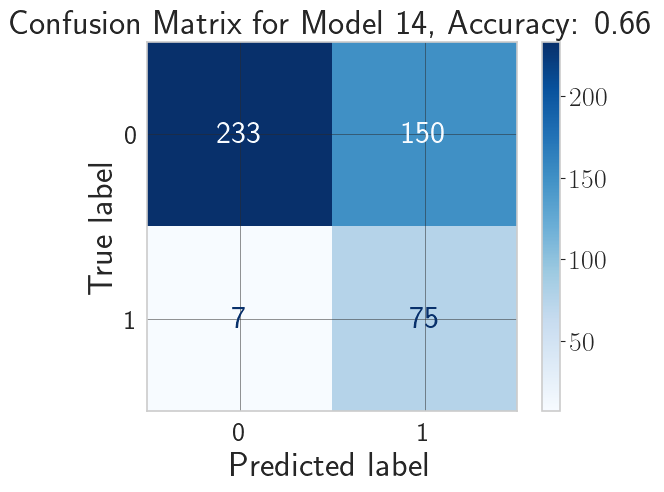

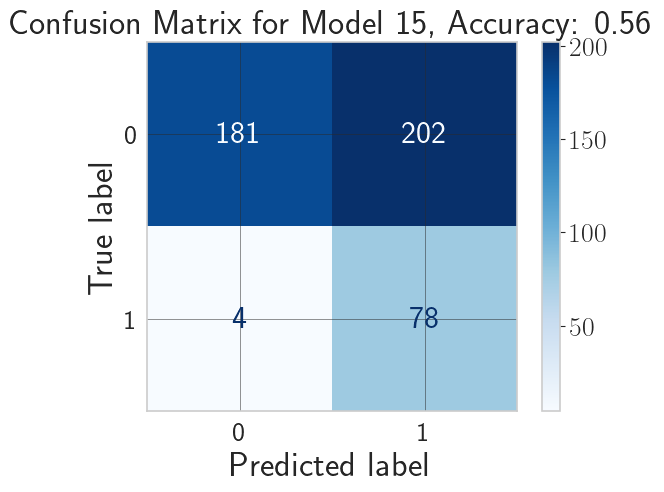

In [7]:
# Confussion matrix for each model
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
for model_num in range(1, 16):
    y_true = df_predictions['Sana'].values
    y_pred = df_predictions[f'pred_{model_num}'].values
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    # plot confusion matrix with title corresponding to model number
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap=plt.cm.Blues)
    # Set title and add accuracy in the title
    disp.ax_.set_title(f'Confusion Matrix for Model {model_num}, Accuracy: {accuracy:.2f}')
    plt.show()

In [8]:
# Lets put the accuracy of all models in a csv file
accuracy_list = []
for model_num in range(1, 16):
    y_true = df_predictions['Sana'].values
    y_pred = df_predictions[f'pred_{model_num}'].values
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_list.append({'Model': model_num, 'Accuracy': accuracy})
accuracy_df = pd.DataFrame(accuracy_list)
accuracy_df.to_csv('model1_accuracies.csv', index=False)
# Now put the f1 score of all models in a csv file
from sklearn.metrics import f1_score
f1_list = []
for model_num in range(1, 16):
    y_true = df_predictions['Sana'].values
    y_pred = df_predictions[f'pred_{model_num}'].values
    f1 = f1_score(y_true, y_pred)
    f1_list.append({'Model': model_num, 'F1_Score': f1})
f1_df = pd.DataFrame(f1_list)
f1_df.to_csv('model1_f1_scores.csv', index=False)

### Logistic Regression with weighted features from base models

Model 1 accuracy: 0.8108
Model 2 accuracy: 0.8215
Model 3 accuracy: 0.8409
Model 4 accuracy: 0.5398
Model 5 accuracy: 0.7419
Model 6 accuracy: 0.5613
Model 7 accuracy: 0.8301
Model 8 accuracy: 0.5828
Model 9 accuracy: 0.7183
Model 10 accuracy: 0.7914
Model 11 accuracy: 0.7183
Model 12 accuracy: 0.5935
Model 13 accuracy: 0.7075
Model 14 accuracy: 0.6624
Model 15 accuracy: 0.5570

Performance weights: [0.81075269 0.82150538 0.84086022 0.53978495 0.74193548 0.56129032
 0.83010753 0.5827957  0.71827957 0.79139785 0.71827957 0.59354839
 0.70752688 0.66236559 0.55698925]
Min weight: 0.5398, Max weight: 0.8409

Meta-Model Accuracy: 0.8280

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        77
           1       0.50      0.31      0.38        16

    accuracy                           0.83        93
   macro avg       0.68      0.62      0.64        93
weighted avg       0.80      0.83      0.81        93


Model Co

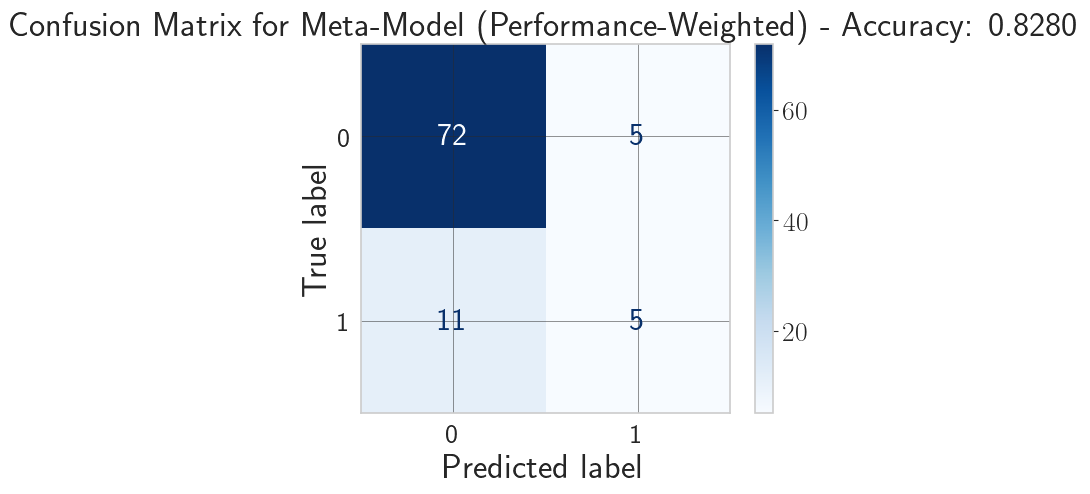

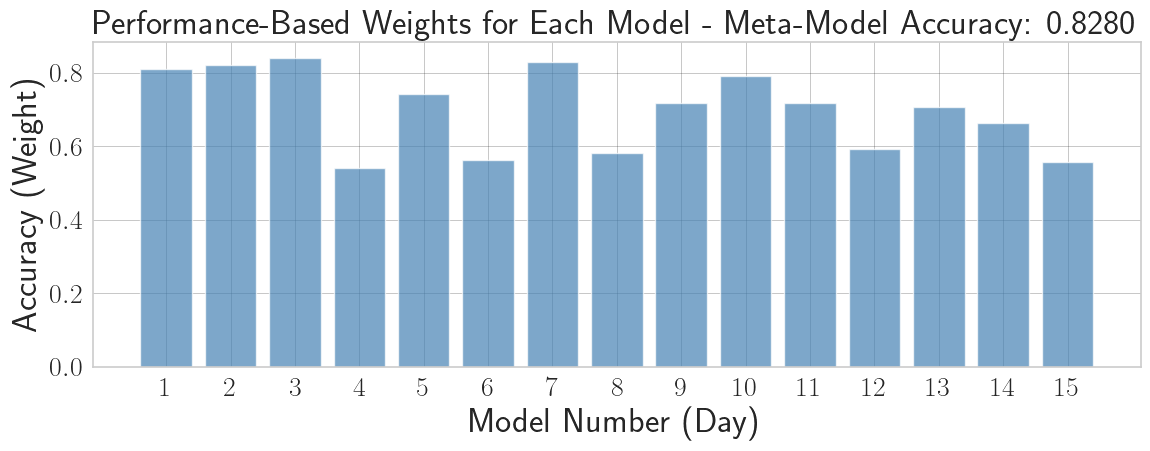

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Prepare data for meta-model
X_meta = df_predictions[[f'pred_{i}' for i in range(1, 16)]].values
y_meta = df_predictions['Sana'].values

# Calculate performance-based weights using accuracy of each model
performance_weights = []
for model_num in range(1, 16):
    y_true = df_predictions['Sana'].values
    y_pred = df_predictions[f'pred_{model_num}'].values
    accuracy = accuracy_score(y_true, y_pred)
    performance_weights.append(accuracy)
    print(f"Model {model_num} accuracy: {accuracy:.4f}")

# Convert to numpy array
weights = np.array(performance_weights)
print(f"\nPerformance weights: {weights}")
print(f"Min weight: {weights.min():.4f}, Max weight: {weights.max():.4f}")

# Apply weights to each feature (multiply each column by its accuracy weight)
X_meta_weighted = X_meta * weights

# Split data
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(
    X_meta_weighted, y_meta, test_size=0.2, random_state=42, stratify=y_meta
)

# Train meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)
meta_model.fit(X_train_meta, y_train_meta)

# Evaluate
y_pred_meta = meta_model.predict(X_test_meta)
print(f"\nMeta-Model Accuracy: {accuracy_score(y_test_meta, y_pred_meta):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_meta, y_pred_meta))

# Show feature importance (coefficients after weighting)
print("\nModel Coefficients (after performance weighting):")
for i, coef in enumerate(meta_model.coef_[0], 1):
    print(f"  Model {i} (weight={weights[i-1]:.4f}): coef={coef:.4f}")

# Confusion matrix for meta-model
disp = ConfusionMatrixDisplay.from_predictions(y_test_meta, y_pred_meta, cmap=plt.cm.Blues)
disp.ax_.set_title(f'Confusion Matrix for Meta-Model (Performance-Weighted) - Accuracy: {accuracy_score(y_test_meta, y_pred_meta):.4f}')
plt.show()

# Visualize the performance weights
plt.figure(figsize=(12, 5))
plt.bar(range(1, 16), weights, color='steelblue', alpha=0.7)
plt.xlabel('Model Number (Day)')
plt.ylabel('Accuracy (Weight)')
plt.title(f'Performance-Based Weights for Each Model - Meta-Model Accuracy: {accuracy_score(y_test_meta, y_pred_meta):.4f}')
plt.xticks(range(1, 16))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Neural Network

Training Neural Network...
Epoch [10/100], Loss: 0.3879
Epoch [20/100], Loss: 0.3152
Epoch [30/100], Loss: 0.3121
Epoch [40/100], Loss: 0.2931
Epoch [50/100], Loss: 0.2956
Epoch [60/100], Loss: 0.2668
Epoch [70/100], Loss: 0.2924
Epoch [80/100], Loss: 0.2624
Epoch [90/100], Loss: 0.2696
Epoch [100/100], Loss: 0.2535

Neural Network Accuracy: 0.8602

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        77
           1       0.60      0.56      0.58        16

    accuracy                           0.86        93
   macro avg       0.76      0.74      0.75        93
weighted avg       0.86      0.86      0.86        93



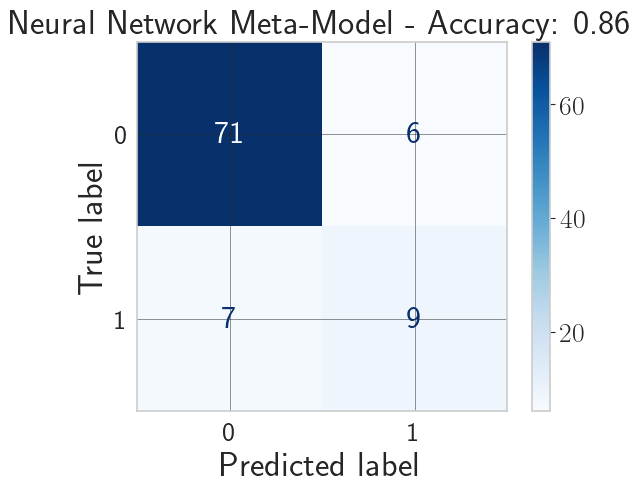

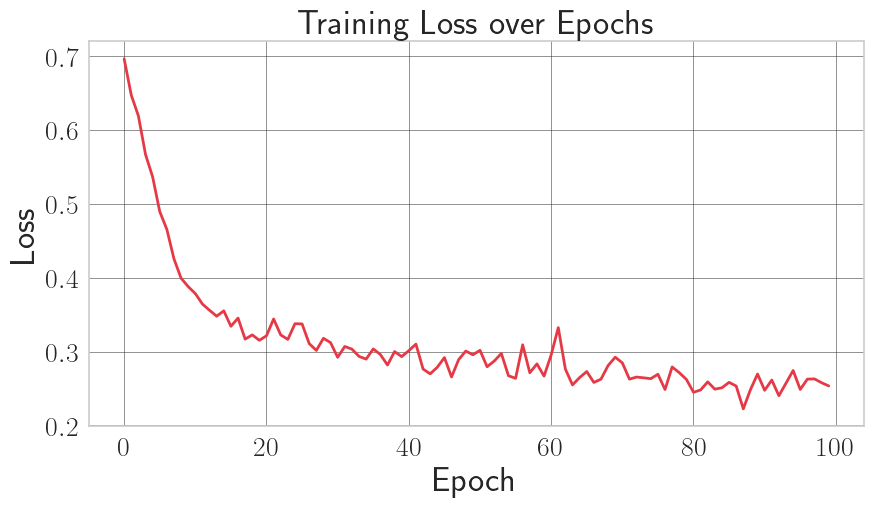


COMPARISON: Neural Network vs Logistic Regression
Neural Network Accuracy: 0.8602
Logistic Regression Accuracy: 0.8280


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define a simple neural network
class MetaClassifier(nn.Module):
    def __init__(self, input_size=15, hidden_size=32):
        super(MetaClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(hidden_size // 2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Prepare data for neural network - NO WEIGHTS APPLIED
X_meta = df_predictions[[f'pred_{i}' for i in range(1, 16)]].values
y_meta = df_predictions['Sana'].values

# Split data
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(
    X_meta, y_meta, test_size=0.2, random_state=42, stratify=y_meta
)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_meta)
y_train_tensor = torch.FloatTensor(y_train_meta).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test_meta)
y_test_tensor = torch.FloatTensor(y_test_meta).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Initialize model, loss, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MetaClassifier(input_size=15, hidden_size=32).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_losses = []
print("Training Neural Network...")

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_pred_proba = model(X_test_tensor).cpu().numpy()
    y_pred_nn = (y_pred_proba > 0.5).astype(int).flatten()

# Metrics
accuracy = accuracy_score(y_test_meta, y_pred_nn)
print(f"\nNeural Network Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_meta, y_pred_nn))

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test_meta, y_pred_nn, cmap=plt.cm.Blues)
disp.ax_.set_title(f'Neural Network Meta-Model - Accuracy: {accuracy:.2f}')
plt.show()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Compare predictions with Logistic Regression
print("\n" + "="*60)
print("COMPARISON: Neural Network vs Logistic Regression")
print("="*60)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test_meta, y_pred_meta):.4f}")